<hr >
<center>
<h1> Trabalho Final </h1>
<h1> Melhoramento de Fotos utilizando Histogramas  </h1>
<h3> Processamento de Imagem </h3>
<h4> Amira Gayatri El Assad Hempel - 10262631</h4>
<h4> Bernardo Barreto Abreu - 5143023 </h4>
<h4> Danilo Leonssio Alves - 10408390 </h4>
</center>
<hr >

<hr >
<center>
<h1> Introdução </h1>
</center>
<hr >

Existem inúmeros métodos de melhoramento de imagens. Nesse trabalho vamos utilizar métodos de melhoramento de imagem via ajuste de contraste por histograma para melhorar fotos da USP-São Carlos tiradas pelos próprios alunos. Utilizaremos a Equalização por histograma (Global), a equalização por histograma adaptativa e a a equalização por histograma adaptativa com limite de contraste (CLAHE)

A Equalização por histograma usa uma transformação derivada do histograma da imagem para transformar todos os pixels. Ela funciona bem quando os valores dos pixels são similares na imagem. Entretanto, quando a imagem contém regiões que são significamente mais claras ou escuras, o contraste nessas regiões não será suficientemente melhorado.

A Equalização de Histograma Adaptativa melhora isso transformando cada pixel com uma função dos seus vizinhos, ao invés de utilizar toda a imagem. Cada pixel é transformado baseado no histograma de um quadrado ao redor dele.

Quando a imagem contém pixels que possuem vizinhos muito parecidos, o histograma fica com picos de frequência nas intencidades que são semelhantes. Isso pode causar um aumento do ruído em regiões muito homogêneas da imagem.

A Equalização de Histograma Adaptativa limitada por contraste (CLAHE) é uma variante da Equalização de Histograma Adaptativa que tenta reduzir esse problema de amplificação de ruído. O CLAHE limita essa amplificação clipando o histograma em valores 
pré-definidos antes de computar a Função de Distribuição Acumulada.



In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2

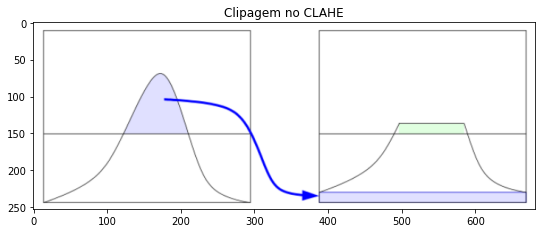

In [ ]:
image = cv2.imread("imagens/Clahe.png")
grafico = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9,12))
plt.title('Clipagem no CLAHE')
plt.imshow(grafico)

<hr >
<center>
<h1> Imagens e Resultados </h1>
</center>
<hr >

Obtivemos as imagens de input de fotos de celular retiradas pelos próprios integrantes na USP-São Carlos. Faremos a discussão de uma dessas imagens *bandeco1.jpg*. A análise pode ser feita transformando a foto em preto e branco ou mudando o tipo de formato de cor para LAB e realizando os procedimentos apenas no canal de luminosidade, preservando os 2 canais de cores.

Vamos iniciar utilizando uma versão preto e branco da imagem

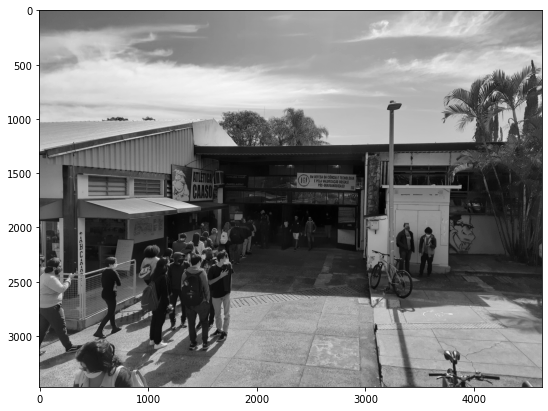

In [ ]:
image = cv2.imread("imagens/bandeco1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(9,12))
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)


Pelo que pudemos observar o próprio celular já faz algum tipo de ajuste de iluminação e, mesmo nessa situação de muita luminosidade (hora do almoço), o histograma da imagem não fica deslocado para direita.

(0.0, 256.0)

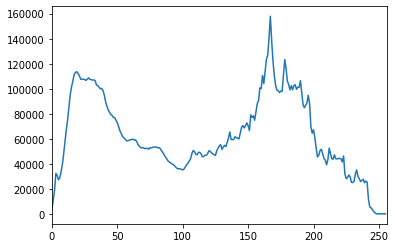

In [ ]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 256])

Por isso, ao fazer a equalização por histograma normal (global) nota-se pouco ganho de detalhes nas áreas mais escuras

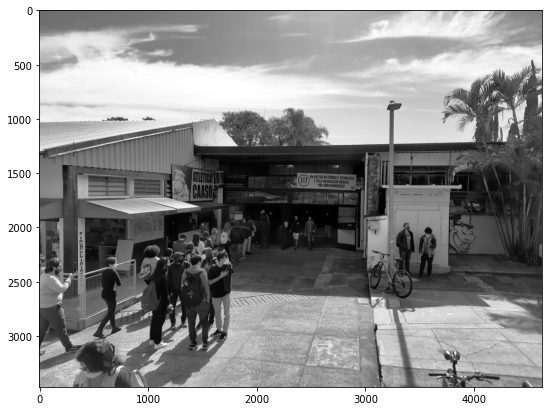

In [ ]:
HistGlobal = cv2.equalizeHist(gray)
plt.figure(figsize=(9,12))
plt.imshow(HistGlobal, cmap='gray', vmin=0, vmax=255)


Ao utilizar a técnica de equalização por histograma adaptativa, espera-se obter mais detalhes da entrada do bandejão sem perder os detalhes da área mais clara.

Vamos utlizar a função CLAHE (contrast limited adaptative histogram equalization), mas sem o limite de contraste (colocamos um valor muito alto para clipLimit)

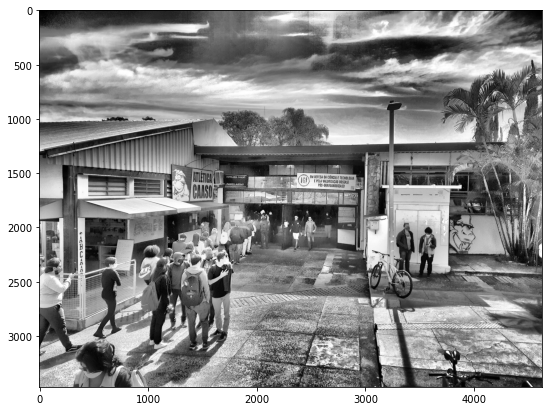

In [ ]:
clahe = cv2.createCLAHE(clipLimit = 1000)
AdapHistEqual = clahe.apply(gray)
plt.figure(figsize=(9,12))
plt.imshow(AdapHistEqual, cmap='gray', vmin=0, vmax=255)

As áreas escuras ficaram mais visíveis, mas foram criados muitos artefatos. Apareceram borrões de iluminação nos alunos e no céu. E as texturas ficaram muito alteradas, como no piso da entrada que parece estar todo manchado e no céu que parece estar tempestuoso e a imagem foi tirada em uma tarde de sol.

Para minimizar os artefatos e esses efeitos deletérios vamos utilizar um limite de contraste (ex: clipLimit = 2)

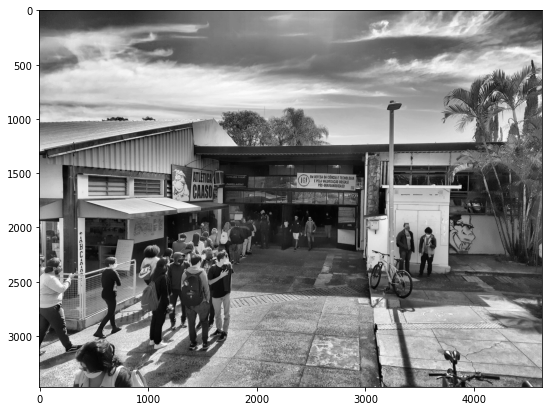

In [ ]:
clahe = cv2.createCLAHE(clipLimit = 2)
CLAHE = clahe.apply(gray)
plt.figure(figsize=(9,12))
plt.imshow(CLAHE, cmap='gray', vmin=0, vmax=255)

Agora podemos ter um pouco mais de contraste na região escura mas sem os artefatos que o adaptative histogram equalization cria.

Ainda podemos observar o aumento de contraste nas áreas mais claras como o céu e o chão. Se isso é útil ou não depende da intenção de quem tirou a foto. Se o objetivo é mostrar os alunos na fila, talvez aumentar o contraste das regiões mais claras não seja interessante.

Esse mesmo processo também pode ser feito com a imagem colorida. Mudamos o formato das cores para o LAB e fazemos o mesmo processo mas apenas com o canal de luminosidade.

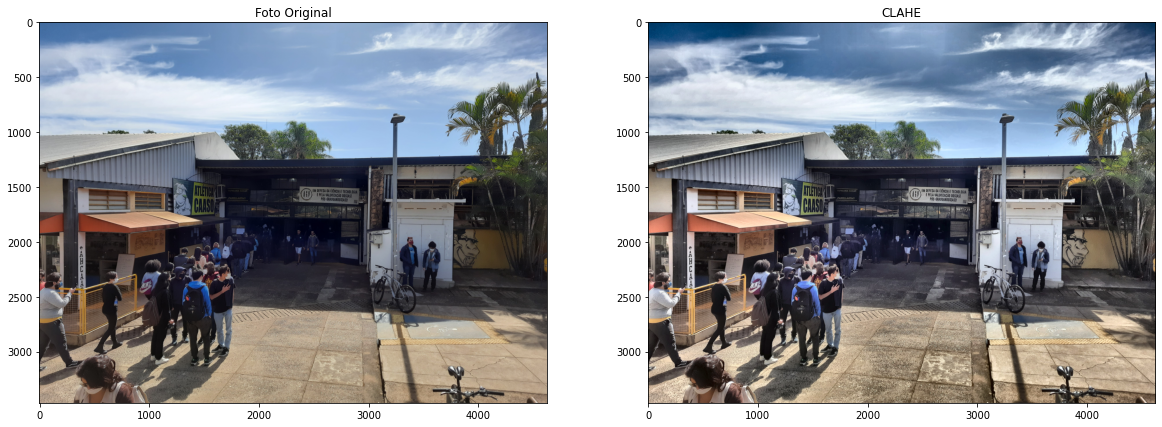

In [ ]:
plt.figure(figsize=(20,40))

plt.subplot(1,2,1)
foto = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(label="Foto Original")
plt.imshow(foto)

plt.subplot(1,2,2)
# Transformando o espaco de cor de BGR para LAB
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2)

# Aplicamos o clahe apenas no canal de Luminosidade
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)

# Transormando o espaço de cor para RGB para plotagem
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
plt.title(label="CLAHE")
plt.imshow(rgb)

Vamos testar em outras imagens.


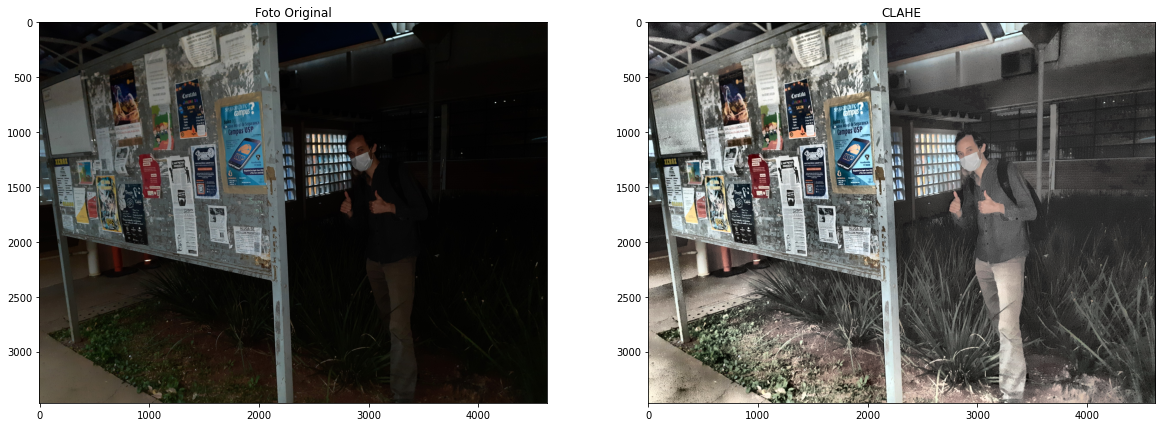

In [ ]:
plt.figure(figsize=(20,40))

plt.subplot(1,2,1)
image = cv2.imread("imagens/mural.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(label="Foto Original")
plt.imshow(image)

plt.subplot(1,2,2)

lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=20)
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
plt.title(label="CLAHE")
plt.imshow(rgb)


Nesse exemplo, a imagem original é muito escura em uma área que é importante para a foto (uma pessoa). Nesse situação é interessante utilizar um ajuste de contraste. Ao aplicar o CLAHE temos uma melhor vizualização da pessoa, assim como pode ser visto a mochila e a vegetação.

Também podemos realizar a equalização por histograma global para realçar a parte escura da foto. A aplicação abaixo mostra a sua utlização. Assim como o CLAHE a imagem escurecida foi realçada, mas utilizando o histograma global o mural perdeu contraste e ficou com muito brilho.

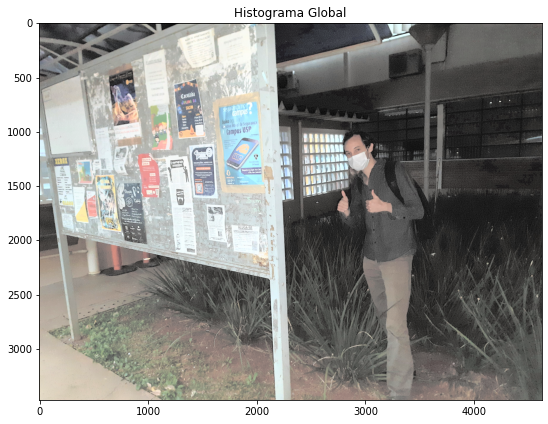

In [ ]:
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
lab_planes = cv2.split(lab)
lab_planes[0] = cv2.equalizeHist(lab_planes[0])
lab = cv2.merge(lab_planes)
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)


plt.figure(figsize=(9,12))
plt.title(label="Equalização por Histograma Global")
plt.imshow(rgb)

Vamos analizar uma outra situação. A imagem abaixo mostra uma placa e as obras atrás. As obras ficam muito escuras na imagem original e uma ferramenta de ajuste de contraste se faz necessária. Nesse foto o CLAHE e a equalização por Histograma Global conseguiram mostrar as obras. A diferença ficou nas áreas mais claras. Como a placa era metálica e produzia reflexo o CLAHE ampliou esse reflexo e criou um borramento ao redor da placa 'serviço social'. O que não aconteceu com a Equalização por histograma global

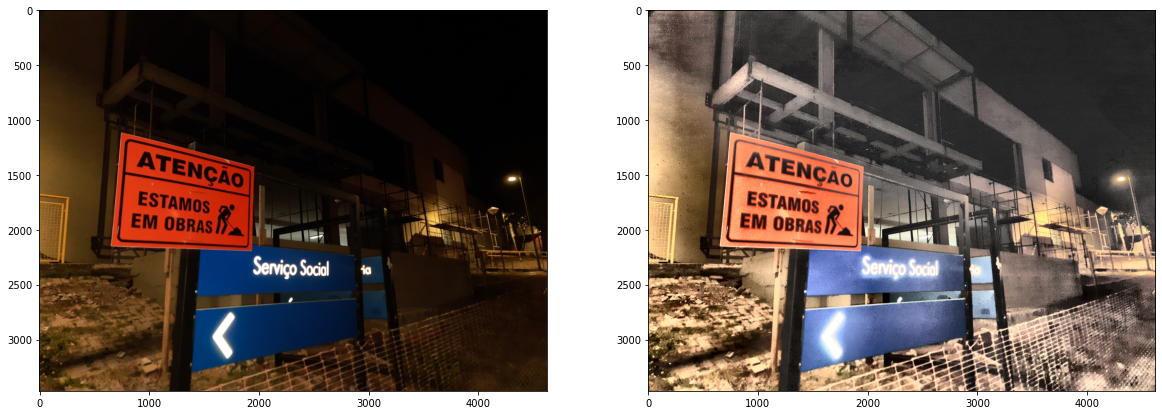

In [ ]:
plt.figure(figsize=(20,40))

plt.subplot(1,2,1)
image = cv2.imread("imagens/obras.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(label="Foto Original")
plt.imshow(image)

plt.subplot(1,2,2)

lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=20)
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
plt.title(label="CLAHE")
plt.imshow(rgb)

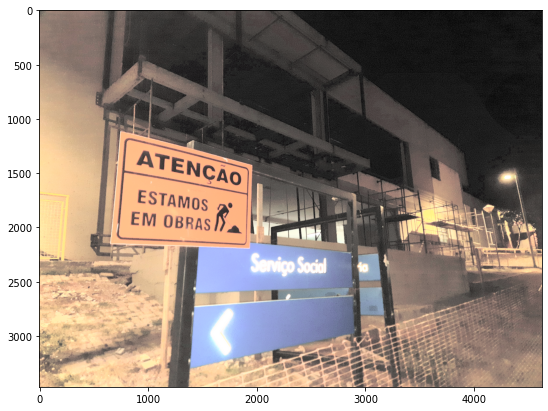

In [ ]:
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
lab_planes = cv2.split(lab)
lab_planes[0] = cv2.equalizeHist(lab_planes[0])
lab = cv2.merge(lab_planes)
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(9,12))
plt.title(label="Equalização por Histograma Global")
plt.imshow(rgb)

<hr >
<center>
<h1> Implementação própria </h1>
</center>
<hr >

In [ ]:
def contrast_limit(hist, c):
    # pega os indices onde o hisotram ultrapassa o limite
    idx = np.where(hist > c)

    surplus = 0
    # calcula o valor sobressalente
    surplus += hist[idx] - c

    # corta o histograma
    hist[idx] = c

    # distribui o valor sobressalente
    hist = hist + (surplus.sum() // 256)

    return hist


def ahe(img, k, c):
    """
    k: tamanho da janela (precisa ser impar)
    c: limite de contraste
    """

    n, m = img.shape
    
    pad = k // 2  # valor da borda
    img = np.pad(img, pad, "reflect")  # acrescenta uma borda do tipo reflexo

    for i in range(pad, pad + n):
        for j in range(pad, pad + m):

            # valor do pixel atual
            l = img[i, j]

            # cria espaço para o histograma
            hist = np.zeros(256, "int")

            # pega a janela
            w = img[i - pad : i + pad + 1, j - pad : j + pad + 1]

            # calcula o histograma
            for x in w.flat:
                hist[x] = hist[x] + 1

            # aplica o limite de contraste
            hist = contrast_limit(hist, c)

            # calcula a função distribuição
            chist = hist[0 : l].sum()

            # encontra o novo valor do pixel
            img[i, j] = chist * 255 / k ** 2

    # retorna a imagem sem as bordas
    img = img[pad:-pad, pad:-pad]

    return img

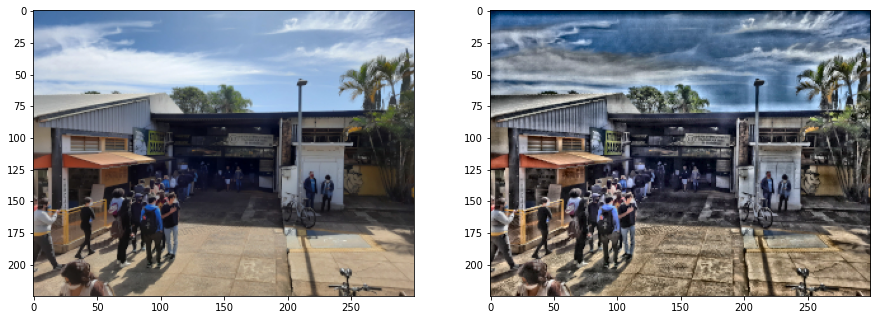

In [ ]:
img = cv2.imread("imagens/bandeco1_peq.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
channels = cv2.split(lab)
channels[0] = ahe(channels[0], 15, 4)
lab = cv2.merge(channels)
img_ahe = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_ahe)
plt.show()

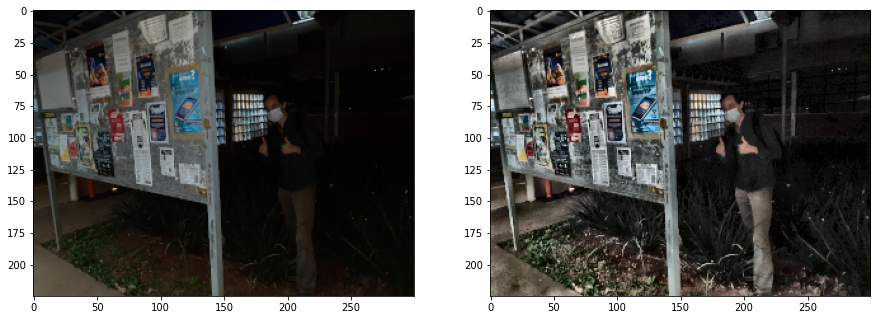

In [ ]:
img = cv2.imread("imagens/mural_peq.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
channels = cv2.split(lab)
channels[0] = ahe(channels[0], 31, 30)
lab = cv2.merge(channels)
img_ahe = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_ahe)
plt.show()

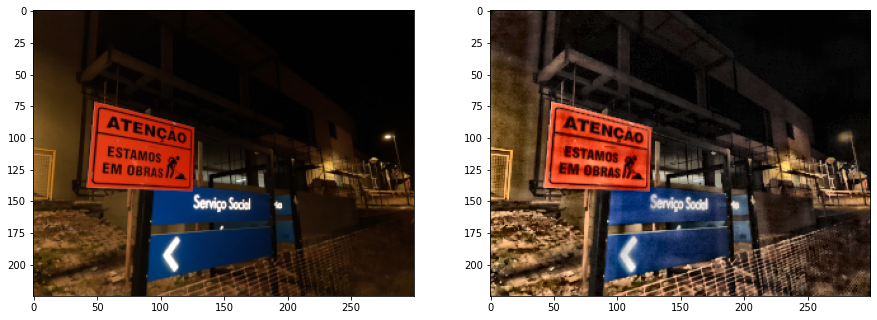

In [ ]:
img = cv2.imread("imagens/obras_peq.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
channels = cv2.split(lab)
channels[0] = ahe(channels[0], 21, 10)
lab = cv2.merge(channels)
img_ahe = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_ahe)
plt.show()

<hr >
<center>
<h1> Conclusão </h1>
</center>
<hr >

Nas nossas imagens e implementações pudemos observar que os métodos de melhoramento de imagem são situacionais. Em áreas bem iluminadas vimos pouca vantagem na utilização de técnicas de melhoramento de imagem por histograma, como pode ser observado na primeira imagem (foto: bandeco). A maior diferença apareceu quando existiam partes importantes da foto que estavam muito escuras e precisavam ser evidênciadas. Quando a foto inteira estava escura a Equalização por Histograma Global foi mais adequada (foto: obras). Quando havia uma mistura de área clara e escura (foto: mural) o CLAHE foi mais adeuqado porque conseguir realçar o contraste da área escura sem perder o contraste da área clara.

Concluimos ser útil conhecer e implementar várias técnicas de melhoramento de imagem por histograma, porque as utilizações são situacionais e depende bastante do objetivo da imagem.